# Off- Facebook Analysis and Spotify Data Report
## By: Rebecca Haywood
### 11/25/2022

### Part 1:

importing all necessary components to graph and display data and accessing my off- facebook activity json file and other components to access the spotify data.  

In [457]:
import pandas as pd
import json
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import base64
import requests

In [458]:
with open(r"C:\Users\footb\Data Fa22\facebook-100006922636969\apps_and_websites_off_of_facebook\your_off-facebook_activity.json") as j:
    your_off_facebook_activity = json.load(j)


Setting up data frame structure and testing out the structure. 

In [459]:
your_off_facebook_activity_df = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})

In [460]:
your_off_facebook_activity_df

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


Before loading the data, I hypothesize that the most frequent apps I have used are Spotify, other social medias (such as Snapchat, Twitter, TikTok and Instagram) and the Canvas app. I chose these apps, because these are the most frequent apps I use on my phone. I know that Instagram is connected to Facebook so I assume that my Instagram data will be featured. In terms of websites, my searches are so sporadic based upon what comes to my mind and when so I assume that random google searches will be included. I know that I've used Amazon a lot recently so I think that that data will be featured. Other websites I think that will be included are my clock-in website I use for work since I use that quite frequently.

Loaded facebook activity with site names and actions. 

In [ ]:
your_off_facebook_activity

Renaming dataframe as test1 and testing it.

In [462]:
test1 = pd.DataFrame(your_off_facebook_activity)

In [463]:
test1.head()

,off_facebook_activity_v2
0,"{'name': 'torrid.com', 'events': [{'id': 28349..."
1,"{'name': 'gianteagle.com', 'events': [{'id': 6..."
2,"{'name': 'BAM', 'events': [{'id': 709002776145..."
3,"{'name': 'OMG', 'events': [{'id': 455676461606..."
4,"{'name': 'subaru.com', 'events': [{'id': 14492..."


Accessing the data specifically in the off_facebook_activity_v2 category, renaming the data as test2 and testing it. 

In [464]:
test2 = pd.DataFrame(your_off_facebook_activity['off_facebook_activity_v2'])

Data within off_facebook_activity_v2 category is shown below.

In [465]:
test2.head()

,name,events
0,torrid.com,"[{'id': 283492242055251, 'type': 'ADD_TO_CART'..."
1,gianteagle.com,"[{'id': 653686881799355, 'type': 'VIEW_CONTENT..."
2,BAM,"[{'id': 709002776145083, 'type': 'CUSTOM', 'ti..."
3,OMG,"[{'id': 455676461606571, 'type': 'CUSTOM', 'ti..."
4,subaru.com,"[{'id': 144927317451189, 'type': 'PAGE_VIEW', ..."


Counting the number of events or times that each site or app was tracked through my off facebook activity. 

In [466]:
events = [ len(x) for x in test2['events']]

labeling counts as events.

In [467]:
test2['counts'] = events

testing test 2 to see the number of counts per site.

In [ ]:
test2

Having the data frame list the top 20 sites that had the most counts in total. 

In [ ]:
test2.sort_values('counts', ascending = False).head(20)

From the data frame, dropping the events information and setting the axis size to 1.

In [470]:
final_df = test2.drop('events', axis = 1)

Displays the final data frame with the names of the top 20 sites and counts. 

In [471]:
final_df.sort_values('counts', ascending = False).head(20)

,name,counts
57,etsy.com,107
415,petsuppliesplus.com,83
295,celtx.com,82
15,shopwhitetree.com,80
103,petsmart.com,72
1,gianteagle.com,54
35,walgreens.com,50
243,quizlet.com,48
122,chewy.com,44
474,hottopic.com,41


In [472]:
final_df1=final_df.sort_values('counts', ascending = False).head(20)

#### Setting up a histogram to display the data of the number of counts on top 20 sites and how often they occurred

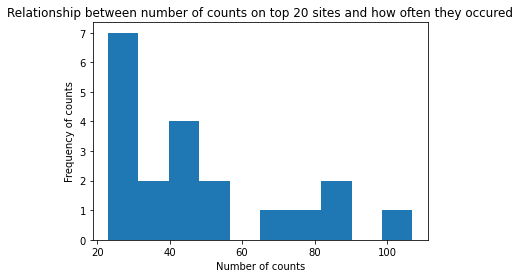

In [473]:
final_df1['counts'].plot.hist()
plt.ylabel('Frequency of counts')
plt.xlabel('Number of counts')
plt.title('Relationship between number of counts on top 20 sites and how often they occured')
plt.show()

From the data of the histogram that it displays, I believe that it is a little confusing. The y-axis is labeled as the number of counts so that means that the 7 of the top 20 had been visited between 23-31 times. The x- axis is labeled as the number of counts which means how many counts in total.The x axis is numbered from 20-100. 20 is the smallest in this data set and 107 is the largest in this data set. The y-axis is numbered from 0-7 to represent the number of times or frequency out of the 20 sites how many sites were visited between certain numbers. A way to make this data set more clear, bar lines would be helpful as well as specific grouping of what the groups are. I only made inferences it is not 100% certain where the lines fall. 

The bar graph better displays the data as the lines are clearer as well as the groupings of data are more concrete. 

This graph lists the names of the sites and the number of counts per site. The x axis ticks are rotated 90 degrees so it is easier to read. 

#### Set up of bar graph to demonstrate the relationship between the number of counts on top 20 sites and how often they occurred

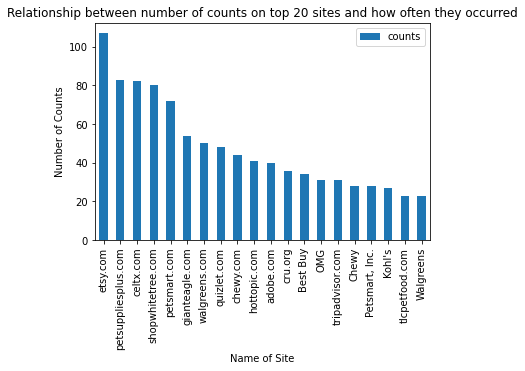

In [474]:
final_df1.plot.bar('name')
plt.xlabel('Name of Site')
plt.ylabel('Number of Counts')
plt.title('Relationship between number of counts on top 20 sites and how often they occurred')
plt.xticks(rotation = 90)
plt.show()

From this graph I can conclude that the top 20 sites are mostly shopping or merchandise based websites. There were not any apps that were listed. From these results my ads I see on Facebook now make a lot more sense since Facebook is tracking some of my website activity. 

I believe that Facebook would also conclude the same analysis. They would agree and be able to explain that the ads are see on Facebook are based upon other sites I visit outside of Facebook. 

I have a lot of questions from this data such as: 
1. How are the sites tracked?
2. How is it determined what sites are tracked and which ones are not?
3. Are these statistics based upon ads that I have clicked on Facebook and then further investigated outside of Facebook? 
4. I clicked on an ad and it took me to etsy. Is that how it is tracked?
5. How can I turn this feature off?
6. I am curious as to when I turn this feature off, how it will affect my ads.

### Part 2:

These cells access the Spotify Keys document that contains the client ID and the client secret. 

In [475]:
keys = pd.read_csv("Spotify-Keys.txt", header = 0, sep = ",")

In [476]:
appid = keys['Client_ID'][0]

In [477]:
appsecret = keys['Client_Secret'][0]

These cells access the client cred, session token and access token.

In [478]:
client_cred = base64.b64encode(str(appid + ":" + appsecret).encode('ascii'))

In [479]:
header = {'Authorization': 'Basic {}'.format(client_cred.decode('ascii'))}

In [480]:
payload = {'grant_type' : 'client_credentials'}
access_token_url = "https://accounts.spotify.com/api/token"

In [481]:
response = requests.post(access_token_url, headers = header, data = payload)

In [482]:
session_token = response.json()['access_token']

In [483]:
session_header = {'Authorization': 'Bearer {}'.format(response.json()['access_token'])}

This next code cell lists the Dearly Beloved album id.

In [484]:
DearlyBeloved_id = '2jVZ3Iqj1wSQE8d8khM9Pi'

I chose Dearly Beloved which is an album by Daughtry. I chose this album because a lot of these songs are inspiring and empowering. I love driving with my windows down to this album just belting it! Fun Fact: My mom and I also went to see Daughtry in concert and this is the album he performed. This album specifically now holds a special memory in my heart. 

In [485]:
album_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(DearlyBeloved_id)

The next few cells are requesting the track information as well as the cells start to gather the data of the track ids.

In [486]:
DearlyBeloved_tracks = requests.get(album_tracks_endpoint, headers = session_header)

In [487]:
DearlyBeloved_dict = json.loads(DearlyBeloved_tracks.text)

In [488]:
DearlyBeloved_tracks.status_code

200

In [489]:
DearlyBeloved_track_ids = [x['id'] for x in DearlyBeloved_dict['items']]

In [490]:
DearlyBeloved_track_ids

['5hvGpBhg1C3ECsKn9UMEAc',
 '7ufw2AvrztmY9Y8pU41FfK',
 '2zZI9xXjyRs1tz0baebU2u',
 '3SSflpFdIv5r6x2fOcQvrH',
 '5UR2dSBGKuWNIwPmfmmis9',
 '0rM8gtOfjotMjvD01sw9KU',
 '17gZuTtqncDzeAUgq3DwzT',
 '35o8eSfYQ7Q6iD396bpiFX',
 '00fjKkoulB5jEb5cOZpSws',
 '2zQaOu3Pi3HpOyUMWGKXit',
 '4ak6ONefj5HI1SDYCnBLiO',
 '2Rl6trOOtjp907YwC3KsNk',
 '4Wm9LOrprI2pHUkuLNScaa']

Shortening the data string for Dearly Beloved. 

In [491]:
DearlyBeloved_track_strings = ','.join(str(x) for x in DearlyBeloved_track_ids)
DearlyBeloved_track_strings

'5hvGpBhg1C3ECsKn9UMEAc,7ufw2AvrztmY9Y8pU41FfK,2zZI9xXjyRs1tz0baebU2u,3SSflpFdIv5r6x2fOcQvrH,5UR2dSBGKuWNIwPmfmmis9,0rM8gtOfjotMjvD01sw9KU,17gZuTtqncDzeAUgq3DwzT,35o8eSfYQ7Q6iD396bpiFX,00fjKkoulB5jEb5cOZpSws,2zQaOu3Pi3HpOyUMWGKXit,4ak6ONefj5HI1SDYCnBLiO,2Rl6trOOtjp907YwC3KsNk,4Wm9LOrprI2pHUkuLNScaa'

In [492]:
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(DearlyBeloved_track_strings)

In [493]:
DearlyBeloved_features = requests.get(track_features_endpoint, headers = session_header)

In [494]:
DearlyBeloved_features.status_code

200

In [495]:
DearlyBeloved_dict = json.loads(DearlyBeloved_features.text)

Lists audio features for the overall album.

In [496]:
DearlyBeloved_dict['audio_features'][0]

{'danceability': 0.482,
 'energy': 0.823,
 'key': 10,
 'loudness': -5.683,
 'mode': 0,
 'speechiness': 0.0384,
 'acousticness': 0.000133,
 'instrumentalness': 0.00102,
 'liveness': 0.105,
 'valence': 0.135,
 'tempo': 123.014,
 'type': 'audio_features',
 'id': '5hvGpBhg1C3ECsKn9UMEAc',
 'uri': 'spotify:track:5hvGpBhg1C3ECsKn9UMEAc',
 'track_href': 'https://api.spotify.com/v1/tracks/5hvGpBhg1C3ECsKn9UMEAc',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5hvGpBhg1C3ECsKn9UMEAc',
 'duration_ms': 288806,
 'time_signature': 4}

In [497]:
DearlyBeloved_df = pd.DataFrame(DearlyBeloved_dict['audio_features'])

Lists audio features of Dearly Beloved by track.

In [ ]:
DearlyBeloved_df

Starting to access the next album's information which is Wake Up Sunshine by All Time Low. I really love this band and their music has helped me through a lot of hard times. Not only that, but their music is really catchy and I also love belting it out in the car. My roommate and I also went to see All Time Low in concert and so this album also has a special memory tied to it for that reason.

In [499]:
WakeUpSunshine_id = '1kwAv74rVTTGMpawGsXtiE'
album_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(WakeUpSunshine_id)
WakeUpSunshine_tracks = requests.get(album_tracks_endpoint, headers = session_header)
print(WakeUpSunshine_tracks.status_code)
WakeUpSunshine_dict = json.loads(WakeUpSunshine_tracks.text)
WakeUpSunshine_track_ids = [x['id'] for x in WakeUpSunshine_dict['items']]
WakeUpSunshine_track_strings = ','.join(str(x) for x in WakeUpSunshine_track_ids)
print(WakeUpSunshine_track_strings)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(WakeUpSunshine_track_strings)

200
02lU0Hj680zVexT4GqJJZ4,402Ecma69MRxeQK6ml6YbI,6lMPUipRF49L8AxLW3F40B,1wQsTZ4AxGoXB9FmD9Nf4o,4nOi9YbtFt7e9I4bbI1FKd,0xUvmXH7JO3klazeWlOyup,0tyR7Bu9P086aWBFZ4QJoo,2nZ3LmQbY2rEd4awJVkQpd,2uVNn2pFpDlx1XrFcEfary,3IDgkcLETJkpp43cad5SwB,2UQ7yB7jUsLTf3lNfrL2QV,2z81IGdOL54S59AUdcFkw5,4LpT15R6GqcKGjT92R8kfS,7AQG7amrUS84JzsarjS28y,3Aq9W9BBCjsFOQqcYyO6IA


In [500]:
WakeUpSunshine_features = requests.get(track_features_endpoint, headers = session_header)
WakeUpSunshine_features.status_code

200

Lists Wake Up Sunshine's overall album audio features.

In [501]:
WakeUpSunshine = json.loads(WakeUpSunshine_features.text)
WakeUpSunshine['audio_features'][0]

{'danceability': 0.55,
 'energy': 0.837,
 'key': 11,
 'loudness': -5.411,
 'mode': 1,
 'speechiness': 0.044,
 'acousticness': 0.0104,
 'instrumentalness': 0,
 'liveness': 0.306,
 'valence': 0.637,
 'tempo': 89.821,
 'type': 'audio_features',
 'id': '02lU0Hj680zVexT4GqJJZ4',
 'uri': 'spotify:track:02lU0Hj680zVexT4GqJJZ4',
 'track_href': 'https://api.spotify.com/v1/tracks/02lU0Hj680zVexT4GqJJZ4',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/02lU0Hj680zVexT4GqJJZ4',
 'duration_ms': 223994,
 'time_signature': 4}

In [502]:
WakeUpSunshine_df = pd.DataFrame(WakeUpSunshine['audio_features'])

Listing all the audio features of each track on Wake Up Sunshine

In [ ]:
WakeUpSunshine_df

Assigning af to be the audio features document

In [504]:
af = pd.read_csv('audio_features.csv', sep = ',')

Lists all the audio features of each track from each album, but does not include an album column and I am unsure why.

In [505]:
audio_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.482,0.823,10,-5.683,0,0.0384,0.000133,0.001020,0.1050,0.135,123.014,audio_features,5hvGpBhg1C3ECsKn9UMEAc,spotify:track:5hvGpBhg1C3ECsKn9UMEAc,https://api.spotify.com/v1/tracks/5hvGpBhg1C3E...,https://api.spotify.com/v1/audio-analysis/5hvG...,288806,4
1,0.266,0.967,2,-3.778,0,0.1740,0.000033,0.000400,0.4820,0.367,113.108,audio_features,7ufw2AvrztmY9Y8pU41FfK,spotify:track:7ufw2AvrztmY9Y8pU41FfK,https://api.spotify.com/v1/tracks/7ufw2AvrztmY...,https://api.spotify.com/v1/audio-analysis/7ufw...,215422,5
2,0.214,0.808,6,-4.668,0,0.0586,0.001540,0.000058,0.0741,0.207,159.869,audio_features,2zZI9xXjyRs1tz0baebU2u,spotify:track:2zZI9xXjyRs1tz0baebU2u,https://api.spotify.com/v1/tracks/2zZI9xXjyRs1...,https://api.spotify.com/v1/audio-analysis/2zZI...,234688,4
3,0.368,0.845,6,-4.870,0,0.0570,0.000243,0.000001,0.2530,0.314,82.781,audio_features,3SSflpFdIv5r6x2fOcQvrH,spotify:track:3SSflpFdIv5r6x2fOcQvrH,https://api.spotify.com/v1/tracks/3SSflpFdIv5r...,https://api.spotify.com/v1/audio-analysis/3SSf...,221224,4
4,0.499,0.879,8,-4.953,0,0.0527,0.000598,0.000667,0.2950,0.372,123.026,audio_features,5UR2dSBGKuWNIwPmfmmis9,spotify:track:5UR2dSBGKuWNIwPmfmmis9,https://api.spotify.com/v1/tracks/5UR2dSBGKuWN...,https://api.spotify.com/v1/audio-analysis/5UR2...,222634,4
5,0.515,0.690,4,-6.178,0,0.0361,0.000427,0.000005,0.0746,0.198,103.010,audio_features,0rM8gtOfjotMjvD01sw9KU,spotify:track:0rM8gtOfjotMjvD01sw9KU,https://api.spotify.com/v1/tracks/0rM8gtOfjotM...,https://api.spotify.com/v1/audio-analysis/0rM8...,212979,4
6,0.352,0.908,0,-5.306,1,0.0810,0.000098,0.000137,0.0851,0.584,125.920,audio_features,17gZuTtqncDzeAUgq3DwzT,spotify:track:17gZuTtqncDzeAUgq3DwzT,https://api.spotify.com/v1/tracks/17gZuTtqncDz...,https://api.spotify.com/v1/audio-analysis/17gZ...,235371,4
7,0.482,0.714,7,-5.343,0,0.0399,0.008780,0.000000,0.1180,0.227,129.964,audio_features,35o8eSfYQ7Q6iD396bpiFX,spotify:track:35o8eSfYQ7Q6iD396bpiFX,https://api.spotify.com/v1/tracks/35o8eSfYQ7Q6...,https://api.spotify.com/v1/audio-analysis/35o8...,211682,4
8,0.319,0.890,0,-3.961,1,0.0598,0.000331,0.000164,0.0462,0.388,176.082,audio_features,00fjKkoulB5jEb5cOZpSws,spotify:track:00fjKkoulB5jEb5cOZpSws,https://api.spotify.com/v1/tracks/00fjKkoulB5j...,https://api.spotify.com/v1/audio-analysis/00fj...,221043,4
9,0.520,0.675,8,-6.714,0,0.0351,0.002030,0.001400,0.0978,0.186,109.970,audio_features,2zQaOu3Pi3HpOyUMWGKXit,spotify:track:2zQaOu3Pi3HpOyUMWGKXit,https://api.spotify.com/v1/tracks/2zQaOu3Pi3Hp...,https://api.spotify.com/v1/audio-analysis/2zQa...,220140,4


I chose Danceability and Tempo because I believe that they have a strong relation. I predict that the higher the danceability, the faster or higher the tempo will be.

#### Set up of scatterplot to demonstrate the relationship between danceability and tempo for Dearly Beloved

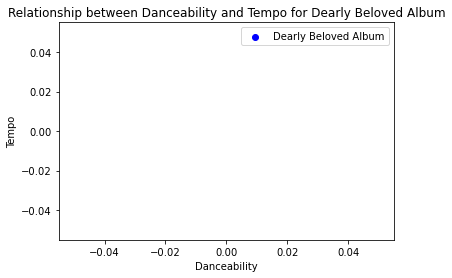

In [506]:
fig1, ax1 = plt.subplots()
db_df = audio_features[audio_features['id'] == 'Dearly Beloved']
ax1.scatter(db_df['danceability'], db_df['tempo'], label = 'Dearly Beloved Album', color = 'blue')
ax1.set_xlabel('Danceability')
ax1.set_ylabel('Tempo')
ax1.set_title('Relationship between Danceability and Tempo for Dearly Beloved Album')
ax1.legend()

plt.show()

I am confused as to why no data is showing.

#### Set up of scatterplot to demonstrate the relationship between danceability and tempo for Dearly Beloved

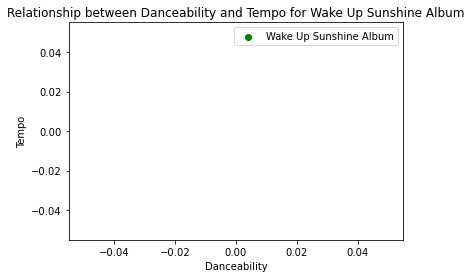

In [507]:
fig1, ax1 = plt.subplots()
db_df = audio_features[audio_features['id'] == 'Wake Up Sunshine']
ax1.scatter(ws_df['danceability'], ws_df['tempo'], label = 'Wake Up Sunshine Album', color = 'green')
ax1.set_xlabel('Danceability')
ax1.set_ylabel('Tempo')
ax1.set_title('Relationship between Danceability and Tempo for Wake Up Sunshine Album')
ax1.legend()

plt.show()

I am still confused why no data is apparent on my graph.

#### Set up of scatterplot to demonstrate the relationship between danceability and tempo between both albums.

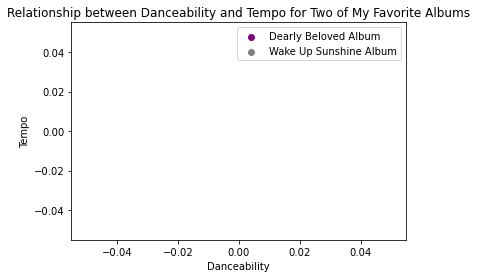

In [508]:
fig1, ax1 = plt.subplots()
db_df = audio_features[audio_features['id'] == 'Dearly Beloved']
ws_df = audio_features[audio_features['id']== 'Wake Up Sunshine']
ax1.scatter(db_df['danceability'], db_df['tempo'], label = 'Dearly Beloved Album', color = 'purple')
ax1.scatter(ws_df['danceability'], ws_df['tempo'], label = 'Wake Up Sunshine Album', color = 'gray')
ax1.set_xlabel('Danceability')
ax1.set_ylabel('Tempo')
ax1.set_title('Relationship between Danceability and Tempo for Two of My Favorite Albums')
ax1.legend()

plt.show()

I am also unsure of why there are not dots at all. I tried messing with the opacity, but that still did nothing. 

#### Set up of histogram to demonstrate the relationship between danceability and tempo.

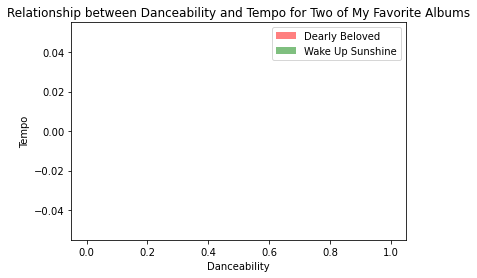

In [509]:
fig1, ax1 = plt.subplots()
db = audio_features[audio_features['id'] == 'Dearly Beloved']['danceability']
ws = audio_features[audio_features['id'] == 'Wake Up Sunshine']['danceability']
ax1.hist(db, alpha = 0.5, color = 'red', label = 'Dearly Beloved')
ax1.hist(ws, alpha = 0.5, color = 'green', label = 'Wake Up Sunshine')
ax1.legend()
plt.xlabel('Danceability')
plt.ylabel('Tempo')
plt.title('Relationship between Danceability and Tempo for Two of My Favorite Albums')
plt.show()

I am still unsure of why no data is being shown. As a result of not being able to see the exact data points, I am unable to make a conclusion. 

#### Set up of Box plot to compare Danceability between both albums

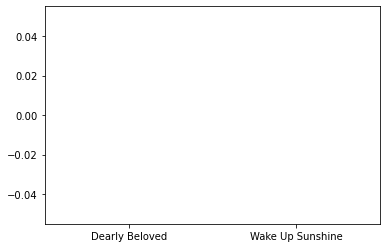

In [510]:
fig2, ax2 = plt.subplots()
db_dan = af[af['id'] == 'Dearly Beloved']['danceability']
ws_dan = af[af['id'] == 'Wake Up Sunshine']['danceability']
db_x = [1] * len(db_dan)
ws_x = [2] * len(ws_dan)
db_x_jitter = np.random.uniform(-0.10, .10, len(db_x))
ws_x_jitter = np.random.uniform(-0.10, .10, len(ws_x))
ax2.scatter(db_x + db_x_jitter, db_dan, alpha = 0.4, s = 25)
ax2.scatter(ws_x + ws_x_jitter, ws_dan, alpha = 0.4, s = 25)
ax2.set_xlim(0.5, 2.5)
ax2.boxplot([db_dan, ws_dan])
ax2.set_xticks([1,2], ['Dearly Beloved', 'Wake Up Sunshine'])
plt.show()

For this report, it helped me realize that I have come a long way from the beginning of my coding. I understand a lot more of the structure and reasoning behind the code. However, as demonstrated and seen in this report, I did struggle a little with the data being apparent. I still went ahead to show how I would go about setting up the different types of graphs as well as explain what the code cells mean. 